In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_json("train.jsonl",lines=True)
test = pd.read_json("test.jsonl",lines=True)
dev = pd.read_json("dev.jsonl",lines=True)

In [ ]:
train.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


4 colonnes : id (identifiant du texte), img ( image correspondante pour le meme), label (binaire) et text (texte du meme) 

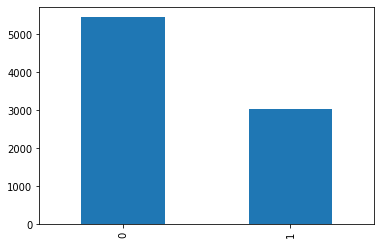

In [ ]:
train["label"].value_counts().plot(kind="bar")

Le data set d'entraînement contient 8 500 memes : 3 000 memes avec le label 1(hateful) contre 5 500 avec le label 0(not hateful)

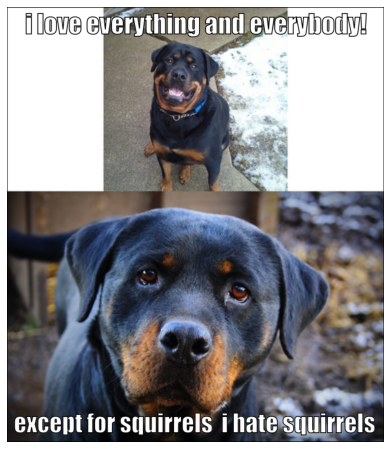

In [ ]:
plt.figure(figsize=(12,8))
meme = plt.imread("37408.png")
plt.axis("off")
plt.imshow(meme)

In [ ]:
test.head()

,id,img,text
0,16395,img/16395.png,handjobs sold seperately
1,37405,img/37405.png,introducing fidget spinner for women
2,94180,img/94180.png,happy pride month let's go beat up lesbians
3,54321,img/54321.png,laughs in [majority of u.s crime rate]
4,97015,img/97015.png,finds out those 72 virgins.. are goats


Le data set de test contient 1 000 memes non labelisés

In [ ]:
dev.head()

,id,img,label,text
0,8291,img/08291.png,1,white people is this a shooting range
1,46971,img/46971.png,1,bravery at its finest
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...
4,80243,img/80243.png,1,mississippi wind chime


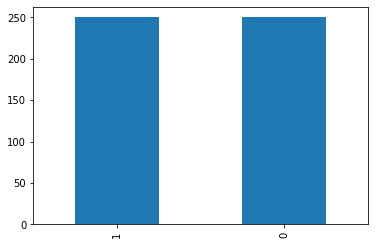

In [ ]:
dev["label"].value_counts().plot(kind="bar")

Le data set de développement contient 500 memes : 250 memes avec le label 1 (hateful) et 250 avec le label 0 (not hateful)

# Analyse statistique du texte sur le dataset train

In [ ]:
def longueur(texte):  # fonction qui compte les mots
    texte = texte.split()
    return len(texte)

train["lentext"] = train["text"].apply(longueur)
train.head()

,id,img,label,text,lentext
0,42953,img/42953.png,0,its their character not their color that matters,8
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,12
2,13894,img/13894.png,0,putting bows on your pet,5
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,11
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...",7


In [ ]:
hateful = train[train["label"]==1]
not_hateful = train[train["label"]==0]
hateful["lentext"].describe()

count    3050.000000
mean       12.793443
std         7.299071
min         1.000000
25%         8.000000
50%        11.000000
75%        17.000000
max        70.000000
Name: lentext, dtype: float64

In [ ]:
not_hateful["lentext"].describe()

count    5450.000000
mean       11.154495
std         6.556696
min         1.000000
25%         7.000000
50%        10.000000
75%        14.000000
max        69.000000
Name: lentext, dtype: float64

Ecart type trop important pour que la longueur du texte soit concluante

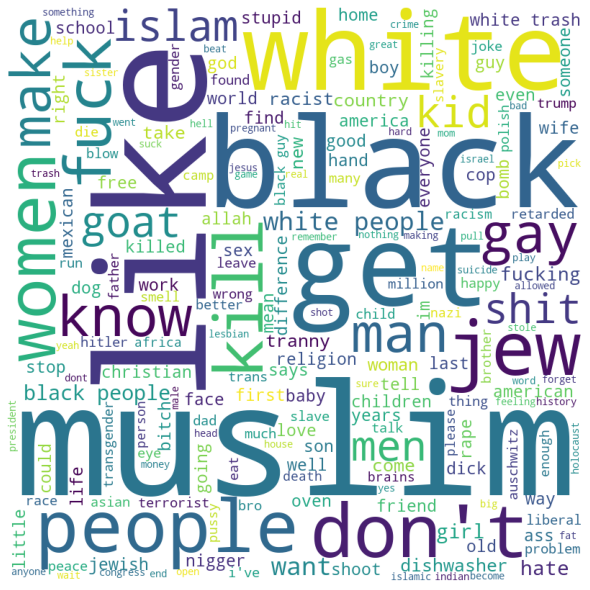

In [ ]:
from wordcloud import WordCloud, STOPWORDS

words = ""
stopwords = ["show", "give", "inside", "removes", "isn't", "day", "turn", "see", "can't", "without", "look", "ye", "steal", "they're", "said", "stand", "oh", "always", "ask", "you're","i'm", "would", "every", "anything", "car", "told", "gonna", "hey", "finally", "back", "away", "wanna", "didn't", "call", "never", "ever", "really", "need", "go", "another", "put", "start", "called", "may", "hear", "trying",  "we're", "us", "made", "think", "time", "i'll", "today", "two", "one", "got", "let", "keep", "getting","long", "still", "say", "doesn't", "walk", "thought", "year", "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the","Mr", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "the", "u"]

for texte in hateful["text"]:
    texte = str(texte)
    mots = texte.split()
    words += " ".join(mots)+" "
 

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

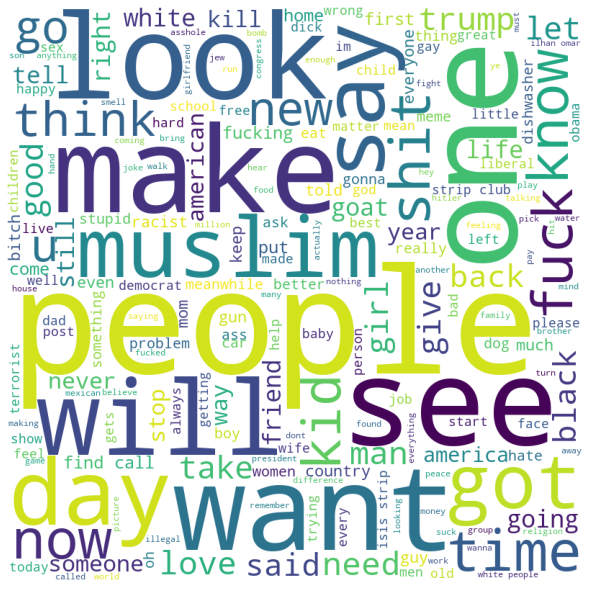

In [ ]:
words = ""
stopwords = set(STOPWORDS)

for texte in not_hateful["text"]:
    texte = str(texte)
    mots = texte.split()
    words += " ".join(mots)+" "
 

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
def occurence(texte):  # fonction qui compte le nb d'occurences pour chaque mot
    texte = texte.split()
    return pd.Series(texte).value_counts()

compte = hateful["text"].apply(occurence)
compte = compte.fillna(0)
compte = compte.sum()
compte = pd.Series.to_frame(compte)
compte = compte.reset_index()
compte

,index,0
0,jew,27.0
1,mad?,1.0
2,get,128.0
3,fuhrerious!,1.0
4,a,1064.0
...,...,...
7487,equality!,1.0
7488,media:,1.0
7489,circle,1.0
7490,pathetic,1.0


In [ ]:
compte.columns = ["mot", "nb d'occurences"]
compte = compte.sort_values(by=["nb d'occurences"])
compte

,mot,nb d'occurences
7491,weaklings,1.0
3657,adore,1.0
3656,frozen,1.0
3655,"going,",1.0
3654,"bill,",1.0
...,...,...
162,i,694.0
191,to,788.0
64,you,919.0
4,a,1064.0


In [ ]:
compte["flag"] = (compte["nb d'occurences"]>10)&(compte["nb d'occurences"]<100)
compte = compte[compte["flag"]==True]
compte

,mot,nb d'occurences,flag
2164,might,11.0,True
137,inside,11.0,True
1120,done,11.0,True
1513,saying,11.0,True
668,use,11.0,True
...,...,...,...
66,them,87.0,True
490,see,88.0,True
128,kill,92.0,True
156,will,97.0,True


In [ ]:
compte = compte.reset_index()
del compte["index"]
del compte["flag"]
compte

,mot,nb d'occurences
0,might,11.0
1,inside,11.0
2,done,11.0
3,saying,11.0
4,use,11.0
...,...,...
419,them,87.0
420,see,88.0
421,kill,92.0
422,will,97.0


In [ ]:
compte.iloc[1]

mot                inside
nb d'occurences      11.0
Name: 1, dtype: object

In [ ]:
for x in compte.index :
  for y in STOPWORDS :
    if compte.iloc[x]["mot"] == y:
      compte.drop(x)

compte

,mot,nb d'occurences
0,might,11.0
1,inside,11.0
2,done,11.0
3,saying,11.0
4,use,11.0
...,...,...
419,them,87.0
420,see,88.0
421,kill,92.0
422,will,97.0


In [ ]:
print(compte["mot"])


1728         dad
1313       gotta
135     bringing
2089       looks
1489        very
          ...   
66          them
490          see
128         kill
156         will
510          his
Name: mot, Length: 424, dtype: object
